In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [44]:
N = 1000
gaussian_quantities = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

In [45]:
X, Y = gaussian_quantities
Y = Y[:, np.newaxis]


### Activation Function

[]

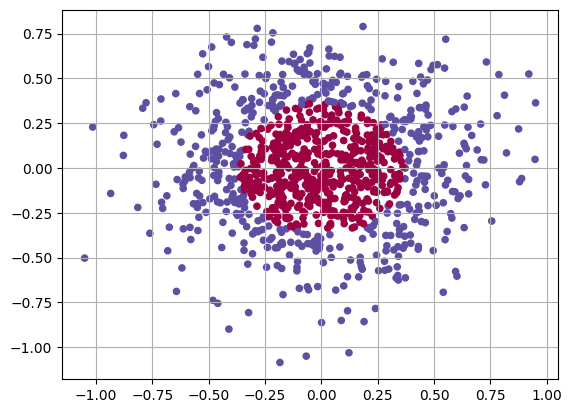

In [49]:
plt.grid()
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=20, cmap=plt.cm.Spectral)
plt.plot()

In [50]:
def sigmoid(x, derivate=False):

    if derivate:
        return np.exp(-x) / (1 + np.exp(-x)) ** 2
    else:
        return  1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0]  = 1
        return x
    else:
        return np.maximum(0, x)

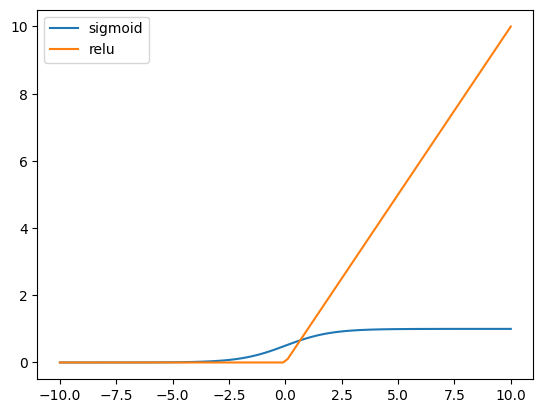

In [8]:
test = np.linspace(10,-10,100)
plt.plot(test, sigmoid(test), label='sigmoid')
plt.plot(test, relu(test), label='relu')
plt.legend()
# plt.acorr(test, sigmoid(test), usevlines=True, normed=True, matestlags=10, lw=2)
plt.show()

### Losses function

In [9]:
def mean_square_error(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [10]:
def initialize_parameter_deep(layers_dim):

    parameters = {}
    LENGTH = len(layers_dim)

    for l in range(0, LENGTH - 1):
        # Se le asignas números aleatorios a los pesos, note que se debe multiplicar por el intervalo [2]
        parameters['W' + str(l + 1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
        parameters['b' + str(l + 1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1 

    return parameters

In [28]:
layer_dim = [2, 4, 8, 1]

params = initialize_parameter_deep(layer_dim)
params

{'W1': array([[-0.71319258,  0.28883307, -0.81777174,  0.76256287],
        [ 0.469048  ,  0.64416122,  0.39363011,  0.91915952]]),
 'b1': array([[0.80358486, 0.90619604, 0.83172786, 0.95610869]]),
 'W2': array([[-0.27921799, -0.71854464,  0.15474055, -0.22111024, -0.21584516,
         -0.47927882, -0.31693274, -0.81928013],
        [ 0.86214478, -0.77892547, -0.93249869,  0.02944196, -0.58470321,
         -0.67478863, -0.20085511, -0.99697326],
        [-0.93514599,  0.81039573,  0.77891134, -0.33661281, -0.63237126,
          0.99853289, -0.91117906, -0.40818007],
        [ 0.38849914,  0.3819528 ,  0.23245917,  0.68596786, -0.74587067,
         -0.94386904, -0.93305139, -0.14717243]]),
 'b2': array([[-5.30263063e-02, -2.13354529e-01, -2.15551785e-01,
          4.60176134e-01,  6.86721147e-01,  1.44374329e-01,
         -4.33907800e-01,  2.59097448e-04]]),
 'W3': array([[-0.41859425],
        [-0.21325674],
        [-0.16811723],
        [ 0.6838611 ],
        [-0.06753834],
        [

In [12]:
params['W1'].shape

(2, 4)

In [13]:
np.matmul(x, params['W1'])

array([[-6.03596430e-02, -1.17466040e-01, -1.26004382e-01,
        -1.97331168e-02],
       [ 5.43921021e-02,  8.27193695e-02,  1.63767243e-01,
        -2.44104909e-02],
       [ 3.77530042e-01,  6.73726830e-01,  9.20510962e-01,
         1.21933276e-02],
       ...,
       [ 7.63189016e-02,  1.97509799e-01,  5.29767190e-02,
         1.14295046e-01],
       [ 7.78456383e-02,  2.01036424e-05,  4.91349103e-01,
        -2.50826218e-01],
       [-6.15302279e-02, -1.58789943e-01, -4.36825515e-02,
        -9.13314507e-02]])

In [14]:
params['A0'] = x

params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])

output = params['A3']
output.shape

(1000, 1)

### Back propagation

In [15]:
params['dZ3'] = mean_square_error(y, output, True) * sigmoid(params['A3'], True)
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

### Gradient descent

In [16]:
LEARNING_RATE = 0.001

In [38]:
params['W3'] = params['W3'] - params['dW3'] * LEARNING_RATE 
params['b3'] = params['b3'] - np.mean(params['dW3'], axis=0, keepdims=True) * LEARNING_RATE

params['W2'] = params['W2'] - params['dW2'] * LEARNING_RATE
params['b2'] = params['b2'] - np.mean(params['dW2'], axis=0, keepdims=True) * LEARNING_RATE

params['W1'] = params['W1'] - params['dW1'] * LEARNING_RATE
params['b1'] = params['b1'] - np.mean(params['dW1'], axis=0, keepdims=True) * LEARNING_RATE

In [68]:
def Train(x_data, lr, params, y,  training=True): 
    '''
        
    '''

    # params['A0'] = x_data
        
    # params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    # params['A1'] = relu(params['Z1'])
    
    # params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    # params['A2'] = relu(params['Z2'])
       
    # params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    # params['A3'] = sigmoid(params['Z3'])
  
    # output = params['A3']
    
    # if training:
    #     # Backpropagation
    
    #     params['dZ3'] =  mean_square_error(y,output,True) * sigmoid(params['A3'],True)
    #     params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
    #     params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
    #     params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
    #     params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
    #     params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
    #     ## Gradinet Descent:
           
    #     params['W3'] = params['W3'] - params['dW3'] * lr
    #     params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
    #     params['W2'] = params['W2'] - params['dW2'] * lr
    #     params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
    #     params['W1'] = params['W1'] -params['dW1'] * lr
    #     params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    # return output


    params['A0'] = x_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']


    if training:

        # Back propagation
        params['dZ3'] =  mean_square_error(y, output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])
        
        ## Gradient Descent
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True)) * lr
    
    return output

In [69]:
layer_dim = [2, 4, 8, 1]

params = initialize_parameter_deep(layer_dim)

errors = []

for _ in range(50_000):
    output = Train(params=params, x_data=X, y=Y, lr=0.001)

    if _ % 25 == 0:
        error = mean_square_error(Y, output)
        print(error)
        errors.append(error)


0.3601962968690571
0.2332814510468704
0.21408092651815114
0.20305921708188066
0.1947215919175528
0.18763828245447425
0.18053246697880843
0.17369963257589036
0.16587425384501192
0.15863557630091646
0.1525726074458828
0.14784432347956636
0.14400709409316687
0.14019394847734332
0.13668091883735844
0.13382066624426475
0.13118053494423576
0.12892537547285957
0.12677875651889392
0.12495639934533864
0.12346997778046745
0.12217820911078954
0.12107179406686956
0.11997529693342598
0.11895478665307425
0.11793769056308596
0.11700346904700235
0.1162381269163836
0.11553287795732492
0.1148924201504858
0.11420408402629431
0.11358689484339843
0.11302601430453588
0.11247508323519116
0.11194016331234068
0.11131948552624177
0.11074130464570203
0.11031381495314155
0.10985923277673706
0.10945676306024407
0.10894366624734336
0.10856863934847695
0.10818113519896197
0.1078348157804639
0.10748988591288897
0.10713560181200955
0.1068585412736532
0.10656682785539294
0.10622495291327287
0.10592193725205358
0.105688

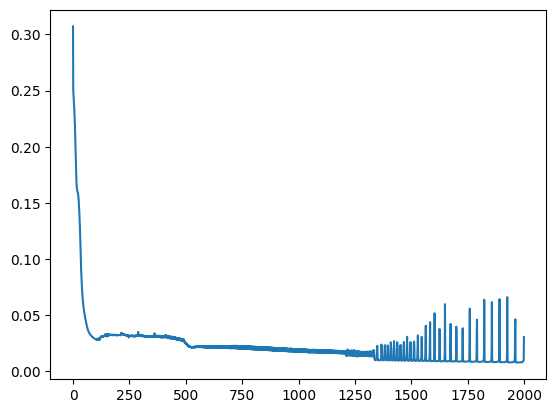

In [65]:
plt.plot(errors)
plt.show()

In [66]:
data_test = np.random.rand(1000, 2) * 2 - 1
y = Train(params=params, x_data=data_test, lr=0.001, y=Y, training=False)

[]

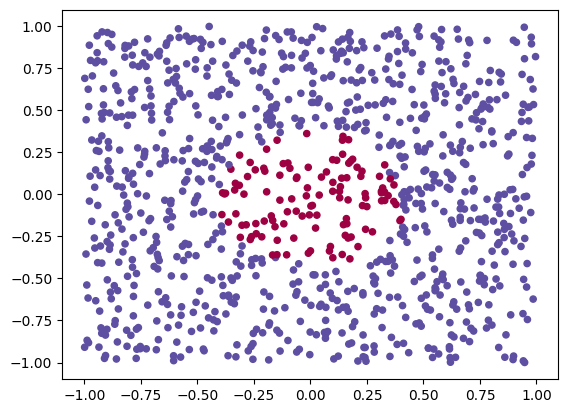

In [67]:
y = np.where(y > 0.5, 1, 0)
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=20, cmap=plt.cm.Spectral)

plt.plot()